<a href="https://colab.research.google.com/github/UrielAnd/Inteligancia_Artificial/blob/main/Restaurante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import de Bibliotecas.

In [ ]:
!pip -q install plotly --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Converte dados binários OU não binários ordinais
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

import pickle


# Lendo base de dados.


In [ ]:
base_dados = pd.read_csv("/content/sample_data/Restaurante.csv", ";", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
base_dados

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,10-30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,10-30,Não


# Realiza a leitura de apenas os 3 primeiras linhas da tabela.

In [ ]:
base_dados.head(3)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim


# Realiza a leitura de apenas os 2 ultimas linhas da tabela.

In [ ]:
base_dados.tail(2)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
10,Não,Não,Não,Não,Nenhum,R,Não,Não,Tailandês,0-10,Não
11,Sim,Sim,Sim,Sim,Cheio,R,Não,Não,Hamburger,30-60,Sim


# Mostra a coluna desejada, seus atributos e a quantidade do mesmo na coluna.

In [ ]:
np.unique(base_dados["conc"], return_counts=True)

(array(['Não', 'Sim'], dtype=object), array([6, 6]))

# Faz uma representação grafica da coluna desejada com seus atributos e sua quantidade em relação um ao outro.

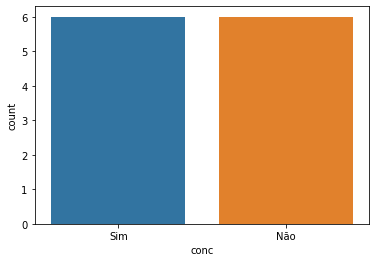

In [ ]:
sns.countplot(x = base_dados["conc"]);

# Pegando os atributos de Entrada e de Classe

In [ ]:
X_prev = base_dados.iloc[:, 0:10].values 
#Pegando apenas os valores das 10 primeiras linhas
# Imprime todas as linhas das colunas 0 a 10
X_prev

array([['Sim', 'Não', 'Não', 'Sim', 'Alguns', 'RRR', 'Não', 'Sim',
        'Francês', '0-10'],
       ['Sim', 'Não', 'Não', 'Sim', 'Cheio', 'R', 'Não', 'Não',
        'Tailandês', '30-60'],
       ['Não', 'Sim', 'Não', 'Não', 'Alguns', 'R', 'Não', 'Não',
        'Hamburger', '0-10'],
       ['Sim', 'Não', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Não',
        'Tailandês', '10-30'],
       ['Sim', 'Não', 'Sim', 'Não', 'Cheio', 'RRR', 'Não', 'Sim',
        'Francês', '>60'],
       ['Não', 'Sim', 'Não', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['Não', 'Sim', 'Não', 'Não', 'Nenhum', 'R', 'Sim', 'Não',
        'Hamburger', '0-10'],
       ['Não', 'Não', 'Não', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandês', '0-10'],
       ['Não', 'Sim', 'Sim', 'Não', 'Cheio', 'R', 'Sim', 'Não',
        'Hamburger', '>60'],
       ['Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Não', 'Sim',
        'Italiano', '10-30'],
       ['Não', 'Não', 'Não', 'Não', 'Nenhum', 'R', '

In [ ]:
X_prev_label = base_dados.iloc[:, 0:10]
X_prev_label

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,10-30
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,10-30


In [ ]:
X_prev[:,5] # Imprime todas as linhas da coluna 5 (tirando o header)

array(['RRR', 'R', 'R', 'R', 'RRR', 'RR', 'R', 'RR', 'R', 'RRR', 'R', 'R'],
      dtype=object)

In [ ]:
Y_classe = base_dados.iloc[:, 10].values # Entrada = X_Prev Saída = Y_classe
Y_classe

array(['Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Não', 'Sim'], dtype=object)

# Tratando os dados.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:

X_prev[:, 1]

X_prev[:, 0] = label_encoder.fit_transform(X_prev[:, 0])
X_prev[:, 1] = label_encoder.fit_transform(X_prev[:, 1])
X_prev[:, 2] = label_encoder.fit_transform(X_prev[:, 2])
X_prev[:, 3] = label_encoder.fit_transform(X_prev[:, 3])
X_prev[:, 6] = label_encoder.fit_transform(X_prev[:, 6])
X_prev[:, 7] = label_encoder.fit_transform(X_prev[:, 7])

X_prev

array([[1, 0, 0, 1, 'Alguns', 'RRR', 0, 1, 'Francês', '0-10'],
       [1, 0, 0, 1, 'Cheio', 'R', 0, 0, 'Tailandês', '30-60'],
       [0, 1, 0, 0, 'Alguns', 'R', 0, 0, 'Hamburger', '0-10'],
       [1, 0, 1, 1, 'Cheio', 'R', 1, 0, 'Tailandês', '10-30'],
       [1, 0, 1, 0, 'Cheio', 'RRR', 0, 1, 'Francês', '>60'],
       [0, 1, 0, 1, 'Alguns', 'RR', 1, 1, 'Italiano', '0-10'],
       [0, 1, 0, 0, 'Nenhum', 'R', 1, 0, 'Hamburger', '0-10'],
       [0, 0, 0, 1, 'Alguns', 'RR', 1, 1, 'Tailandês', '0-10'],
       [0, 1, 1, 0, 'Cheio', 'R', 1, 0, 'Hamburger', '>60'],
       [1, 1, 1, 1, 'Cheio', 'RRR', 0, 1, 'Italiano', '10-30'],
       [0, 0, 0, 0, 'Nenhum', 'R', 0, 0, 'Tailandês', '0-10'],
       [1, 1, 1, 1, 'Cheio', 'R', 0, 0, 'Hamburger', '30-60']],
      dtype=object)

In [ ]:
onehotencoder_rest = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [4,5,8,9])], remainder="passthrough")
# Passamos como argumento as colunas que gostaríamos de binarizar

In [ ]:
X_prev = onehotencoder_rest.fit_transform(X_prev)
X_prev

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 1, 0, 0, 1, 0, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
        0.0, 1, 0, 0, 1, 0, 0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0, 1, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        0.0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 1, 0, 1, 0, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0, 1, 0, 1, 1, 1],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0, 1, 0, 0, 1, 0],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 0, 0, 0, 1, 1, 1],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0, 1, 1, 0, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.

In [ ]:
X_prev.shape # Mostra a quantidade de linhas e colunas

(12, 20)

# Modelo de amostragem Holdout

In [ ]:
Y_classe
Y_classe.shape

(12,)

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_prev, Y_classe, test_size = 0.20, random_state=0)
# Random state = 0 = toda vez que rodarmos ele gera outra instância
# X_treino = atributos para treinar
# Y_treino = classe objetivo dos atributos de treino
# Y = atributos de saída

# X_teste = atributos do teste
# Y_teste = classe objetivo dos atributos de teste

print(X_treino.shape)
X_teste.shape

(9, 20)


(3, 20)

In [ ]:
X_treino.shape

(9, 20)

In [ ]:
X_teste.shape

(3, 20)

In [ ]:
Y_treino.shape

(9,)

In [ ]:
Y_teste.shape

(3,)

In [ ]:
with open('restaurante.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, Y_treino, Y_teste], f)